## Data Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv(r"\train.csv")

In [4]:
df

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,ID58588,0.355089,0.13,0.644231,C8,8794,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0
58588,ID58589,1.199642,0.02,0.519231,C14,7788,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
58589,ID58590,1.162273,0.05,0.451923,C5,34738,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
58590,ID58591,1.236307,0.14,0.557692,C8,8794,1,B2,M6,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0


In [5]:
df['is_claim'].value_counts()

0    54844
1     3748
Name: is_claim, dtype: int64

In [6]:
df.isnull().sum()

policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length      

# Exploration

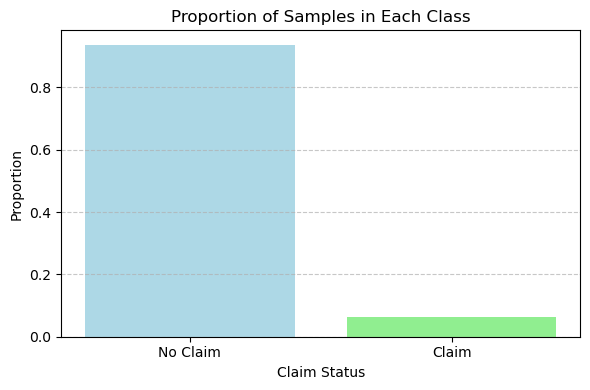

In [7]:
# Calculate the proportion of samples in each class
class_counts = df['is_claim'].value_counts()
proportions = class_counts / len(df)

# Plot the bar chart
plt.figure(figsize=(6, 4))
plt.bar(proportions.index, proportions, color=['lightblue', 'lightgreen'])
plt.xticks(proportions.index, ['No Claim', 'Claim'])
plt.xlabel('Claim Status')
plt.ylabel('Proportion')
plt.title('Proportion of Samples in Each Class')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [8]:
df.columns

Index(['policy_id', 'policy_tenure', 'age_of_car', 'age_of_policyholder',
       'area_cluster', 'population_density', 'make', 'segment', 'model',
       'fuel_type', 'max_torque', 'max_power', 'engine_type', 'airbags',
       'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder',
       'transmission_type', 'gear_box', 'steering_type', 'turning_radius',
       'length', 'width', 'height', 'gross_weight', 'is_front_fog_lights',
       'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'is_claim'],
      dtype='object')

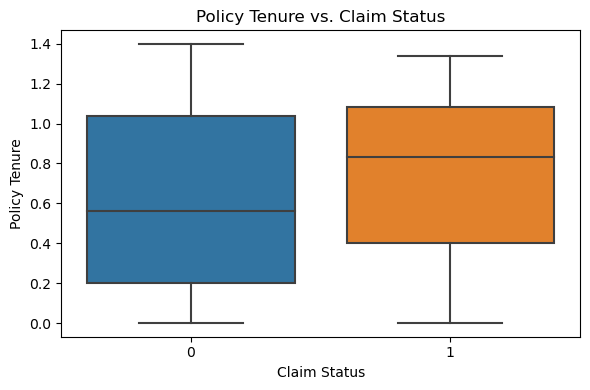

In [10]:
import seaborn as sns
plt.figure(figsize=(6, 4))
sns.boxplot(x='is_claim', y='policy_tenure', data=df)
plt.xlabel('Claim Status')
plt.ylabel('Policy Tenure')
plt.title('Policy Tenure vs. Claim Status')
plt.tight_layout()

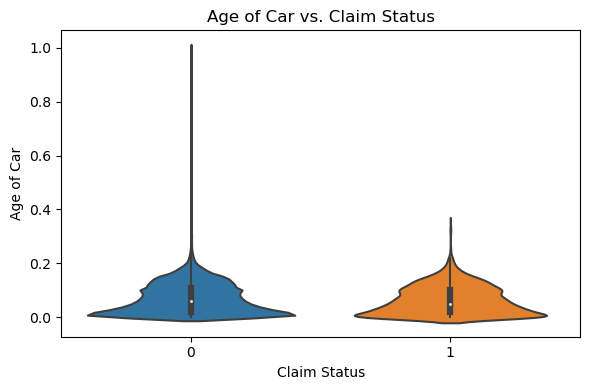

In [11]:
plt.figure(figsize=(6, 4))
sns.violinplot(x='is_claim', y='age_of_car', data=df)
plt.xlabel('Claim Status')
plt.ylabel('Age of Car')
plt.title('Age of Car vs. Claim Status')
plt.tight_layout()

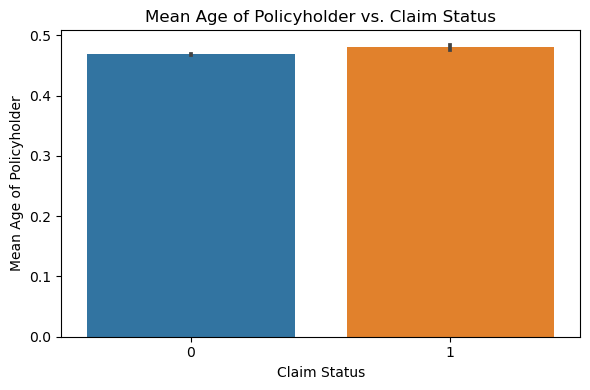

In [12]:
plt.figure(figsize=(6, 4))
sns.barplot(x='is_claim', y='age_of_policyholder', data=df)
plt.xlabel('Claim Status')
plt.ylabel('Mean Age of Policyholder')
plt.title('Mean Age of Policyholder vs. Claim Status')
plt.tight_layout()

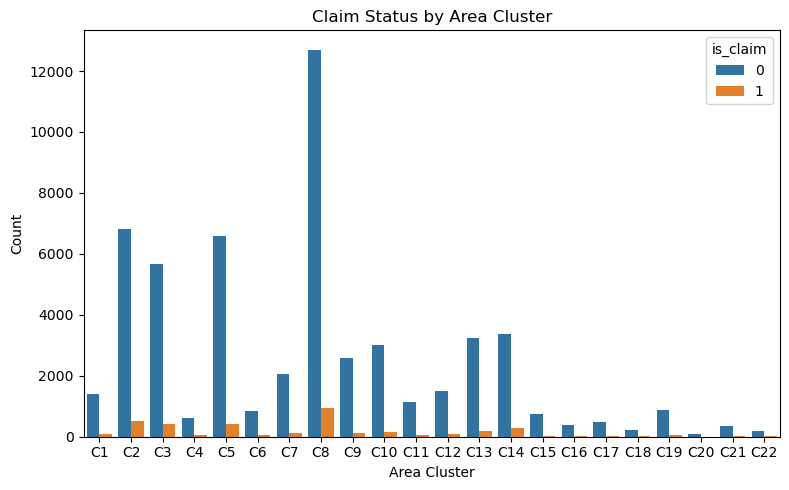

In [13]:
plt.figure(figsize=(8, 5))
sns.countplot(x='area_cluster', hue='is_claim', data=df)
plt.xlabel('Area Cluster')
plt.ylabel('Count')
plt.title('Claim Status by Area Cluster')
plt.tight_layout()

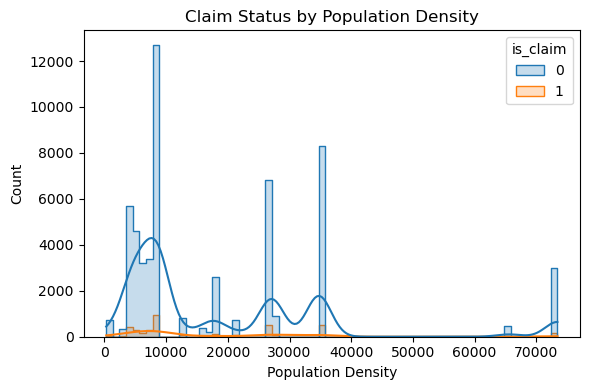

In [14]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='population_density', hue='is_claim', element='step', kde=True)
plt.xlabel('Population Density')
plt.ylabel('Count')
plt.title('Claim Status by Population Density')
plt.tight_layout()

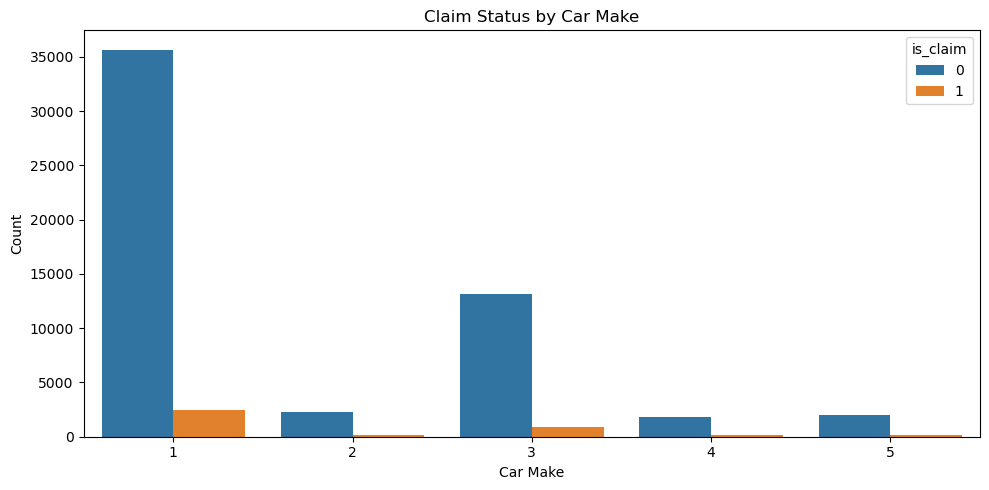

In [16]:
plt.figure(figsize=(10, 5))
sns.countplot(x='make', hue='is_claim', data=df)
plt.xlabel('Car Make')
plt.ylabel('Count')
plt.title('Claim Status by Car Make')
plt.tight_layout()

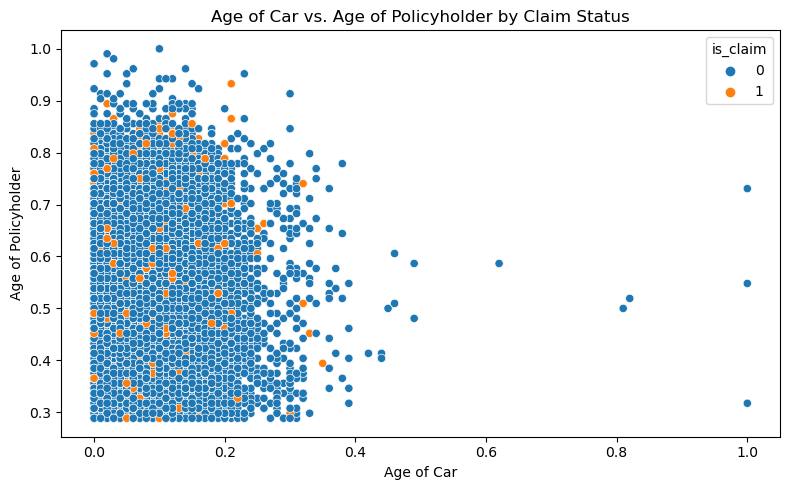

In [18]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='age_of_car', y='age_of_policyholder', hue='is_claim', data=df)
plt.xlabel('Age of Car')
plt.ylabel('Age of Policyholder')
plt.title('Age of Car vs. Age of Policyholder by Claim Status')
plt.tight_layout()

plt.show()

In [19]:
df.drop(['policy_id'],inplace=True,axis=1)
df.drop(['max_torque'],inplace=True,axis=1)
df.drop(['max_power'],inplace=True,axis=1)

# Categorical Encoding

In [27]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = df.select_dtypes(include=['object']).columns

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to all categorical columns
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Model Training

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, classification_report
import seaborn as sns
X = df.drop('is_claim', axis=1)
y = df['is_claim']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [32]:
# Initializing the models
random_forest = RandomForestClassifier(random_state=42)
gradient_boosting = GradientBoostingClassifier(random_state=42)
xgboost = XGBClassifier(random_state=42)
lightgbm = LGBMClassifier(random_state=42)

# Fitting the models
random_forest.fit(X_train, y_train)
gradient_boosting.fit(X_train, y_train)
xgboost.fit(X_train, y_train)
lightgbm.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 2992, number of negative: 43881
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004073 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 569
[LightGBM] [Info] Number of data points in the train set: 46873, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063832 -> initscore=-2.685539
[LightGBM] [Info] Start training from score -2.685539


LGBMClassifier(random_state=42)

## Evaluation of models

In [33]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

In [34]:
# Function to plot ROC curve
def plot_roc_curve(y_true, y_proba, model_name):
    fpr, tpr, thresholds = roc_curve(y_true, y_proba)
    auc = roc_auc_score(y_true, y_proba)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend()
    plt.show()

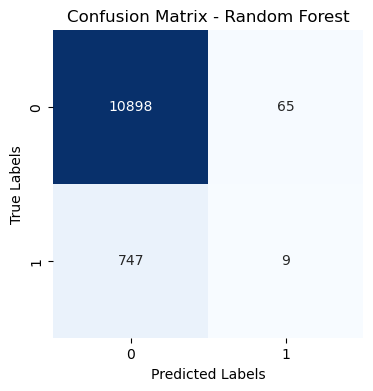

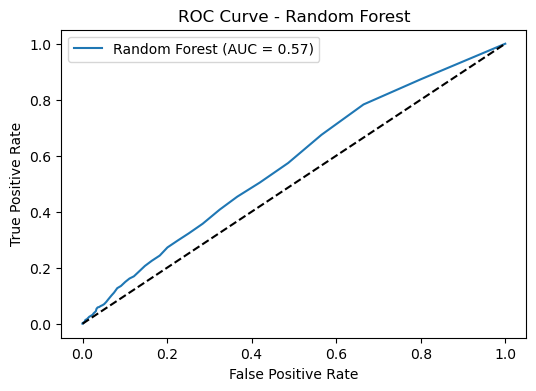

Classification Report - Random Forest:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     10963
           1       0.12      0.01      0.02       756

    accuracy                           0.93     11719
   macro avg       0.53      0.50      0.49     11719
weighted avg       0.88      0.93      0.90     11719




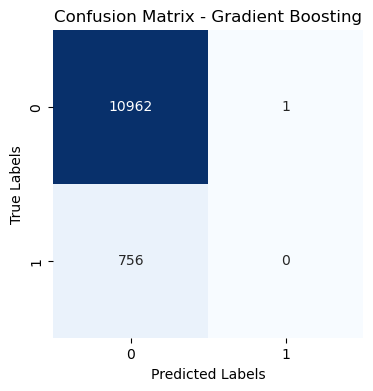

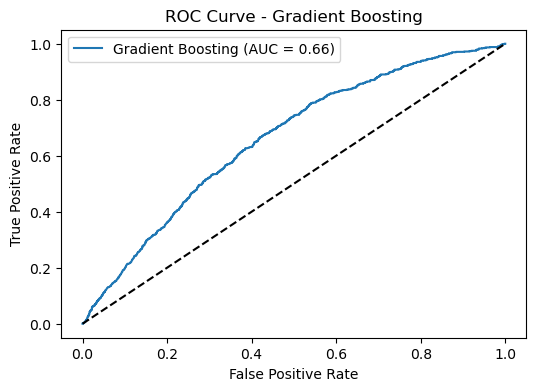

Classification Report - Gradient Boosting:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     10963
           1       0.00      0.00      0.00       756

    accuracy                           0.94     11719
   macro avg       0.47      0.50      0.48     11719
weighted avg       0.88      0.94      0.90     11719




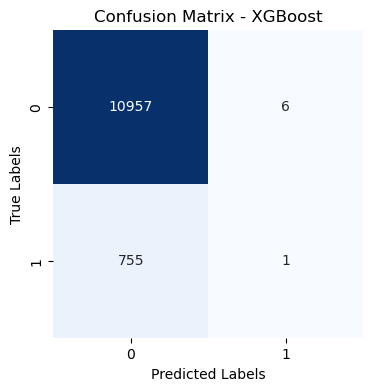

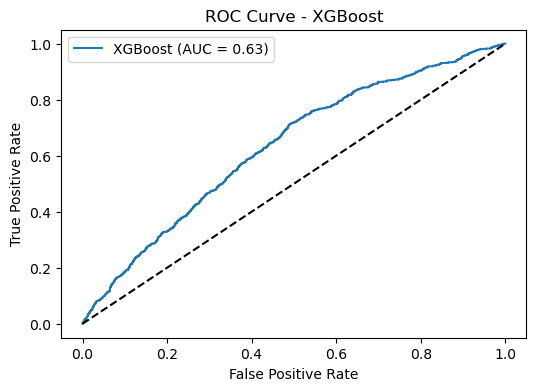

Classification Report - XGBoost:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     10963
           1       0.14      0.00      0.00       756

    accuracy                           0.94     11719
   macro avg       0.54      0.50      0.48     11719
weighted avg       0.88      0.94      0.90     11719




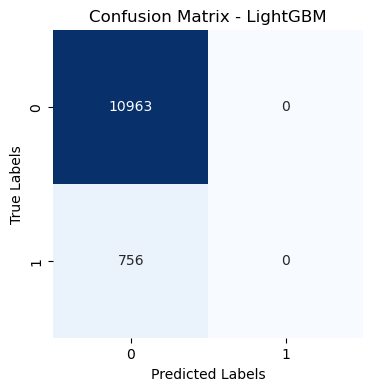

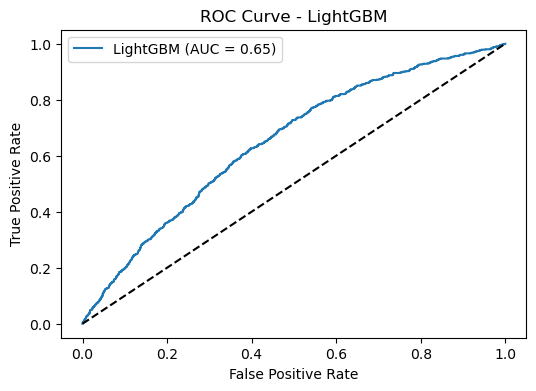

Classification Report - LightGBM:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     10963
           1       0.00      0.00      0.00       756

    accuracy                           0.94     11719
   macro avg       0.47      0.50      0.48     11719
weighted avg       0.88      0.94      0.90     11719




C:\Users\Paul\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Paul\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Paul\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
# Evaluating and plotting results for each model
models = [random_forest, gradient_boosting, xgboost, lightgbm]
model_names = ['Random Forest', 'Gradient Boosting', 'XGBoost', 'LightGBM']

for model, model_name in zip(models, model_names):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    plot_confusion_matrix(y_test, y_pred, model_name)
    plot_roc_curve(y_test, y_proba, model_name)
    report = classification_report(y_test, y_pred)
    print(f'Classification Report - {model_name}:\n{report}\n')

## Oversampling (SMOTE)

[LightGBM] [Info] Number of positive: 43998, number of negative: 43752
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006288 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2207
[LightGBM] [Info] Number of data points in the train set: 87750, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501402 -> initscore=0.005607
[LightGBM] [Info] Start training from score 0.005607


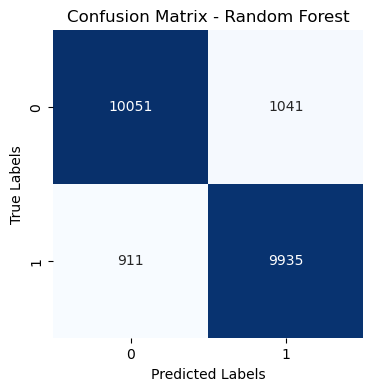

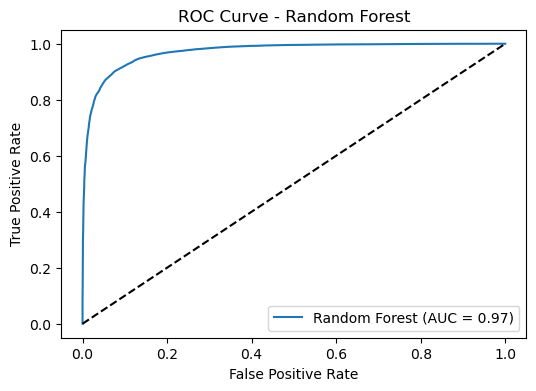

Classification Report - Random Forest:
              precision    recall  f1-score   support

           0       0.92      0.91      0.91     11092
           1       0.91      0.92      0.91     10846

    accuracy                           0.91     21938
   macro avg       0.91      0.91      0.91     21938
weighted avg       0.91      0.91      0.91     21938




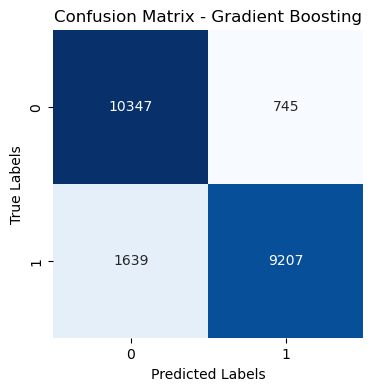

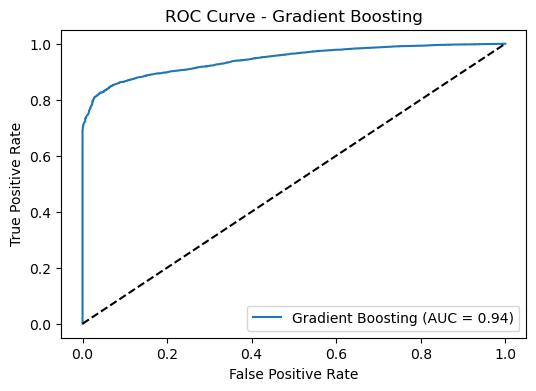

Classification Report - Gradient Boosting:
              precision    recall  f1-score   support

           0       0.86      0.93      0.90     11092
           1       0.93      0.85      0.89     10846

    accuracy                           0.89     21938
   macro avg       0.89      0.89      0.89     21938
weighted avg       0.89      0.89      0.89     21938




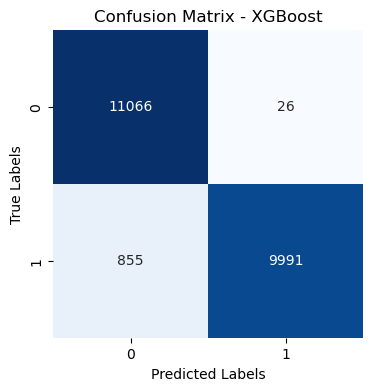

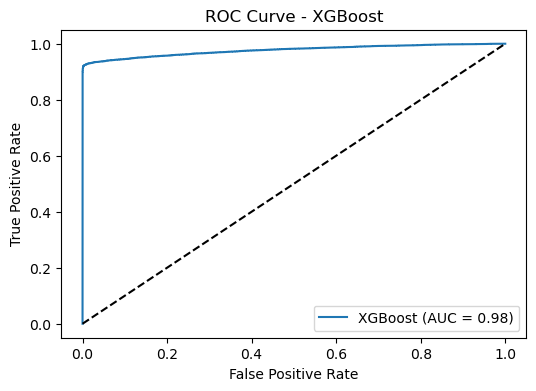

Classification Report - XGBoost:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     11092
           1       1.00      0.92      0.96     10846

    accuracy                           0.96     21938
   macro avg       0.96      0.96      0.96     21938
weighted avg       0.96      0.96      0.96     21938




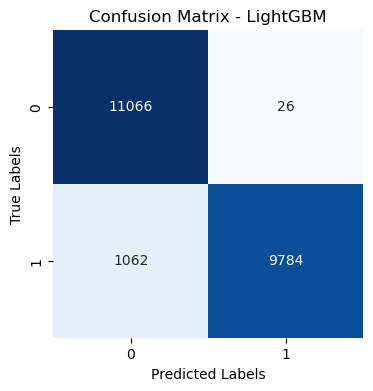

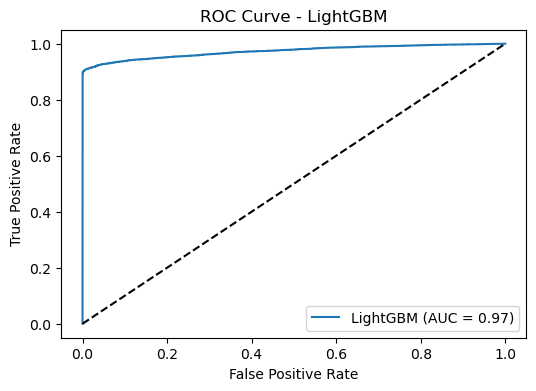

Classification Report - LightGBM:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     11092
           1       1.00      0.90      0.95     10846

    accuracy                           0.95     21938
   macro avg       0.95      0.95      0.95     21938
weighted avg       0.95      0.95      0.95     21938




In [36]:
# Apply SMOTE to balance the classes
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Splitting the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initializing the models
random_forest = RandomForestClassifier(random_state=42)
gradient_boosting = GradientBoostingClassifier(random_state=42)
xgboost = XGBClassifier(random_state=42)
lightgbm = LGBMClassifier(random_state=42)

# Fitting the models
random_forest.fit(X_train, y_train)
gradient_boosting.fit(X_train, y_train)
xgboost.fit(X_train, y_train)
lightgbm.fit(X_train, y_train)

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

# Function to plot ROC curve
def plot_roc_curve(y_true, y_proba, model_name):
    fpr, tpr, thresholds = roc_curve(y_true, y_proba)
    auc = roc_auc_score(y_true, y_proba)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend()
    plt.show()

# Evaluating and plotting results for each model
models = [random_forest, gradient_boosting, xgboost, lightgbm]
model_names = ['Random Forest', 'Gradient Boosting', 'XGBoost', 'LightGBM']

for model, model_name in zip(models, model_names):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    plot_confusion_matrix(y_test, y_pred, model_name)
    plot_roc_curve(y_test, y_proba, model_name)
    report = classification_report(y_test, y_pred)
    print(f'Classification Report - {model_name}:\n{report}\n')

## Feature Selection

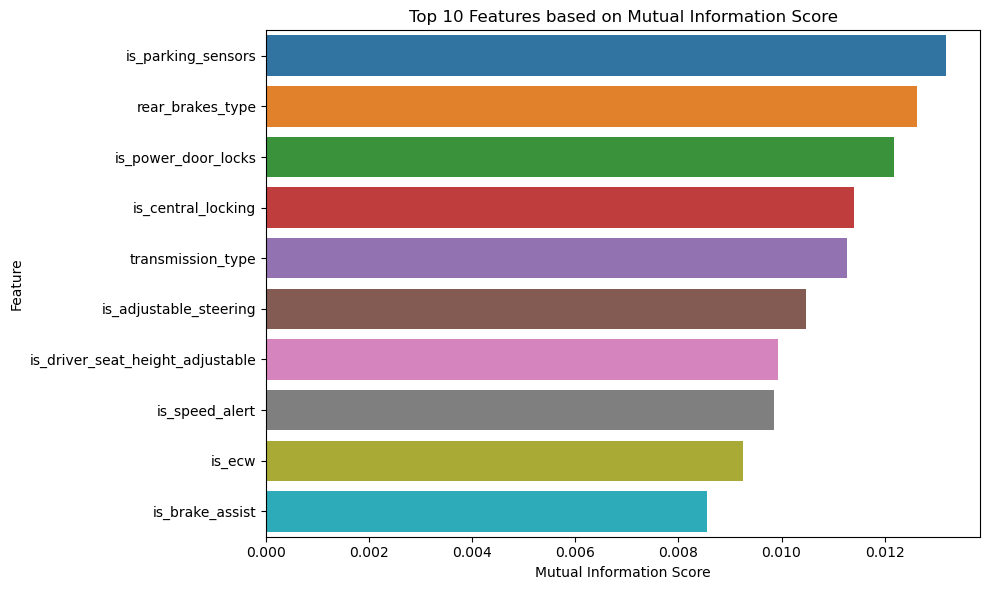

In [37]:
from sklearn.feature_selection import mutual_info_classif
# Split the data into features (X) and target (y)
X = df.drop('is_claim', axis=1)
y = df['is_claim']

# Compute Mutual Information Score
mi_scores = mutual_info_classif(X, y, random_state=42)

# Create a DataFrame to store feature names and corresponding scores
mi_scores_df = pd.DataFrame({'Feature': X.columns, 'Mutual_Info_Score': mi_scores})
mi_scores_df = mi_scores_df.sort_values(by='Mutual_Info_Score', ascending=False)

# Plot the top 10 features in a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Mutual_Info_Score', y='Feature', data=mi_scores_df.head(10))
plt.xlabel('Mutual Information Score')
plt.ylabel('Feature')
plt.title('Top 10 Features based on Mutual Information Score')
plt.tight_layout()
plt.show()